In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.lines import Line2D
import seaborn as sns
style.use('plotting.mplstyle')
import numpy as np
import json

In [2]:
# Load everything

# betaPlusMixture
with open(f'../data/component_spin_betaPlusMixture.json', 'r') as f:
    data_betaPlusMixture = json.load(f)

# betaPlusTruncatedMixture
with open(f'../data/component_spin_betaPlusTruncatedMixture.json', 'r') as f:
    data_betaPlusTruncatedMixture = json.load(f)

# betaSpikePlusMixture
with open(f'../data/component_spin_betaSpikePlusMixture.json', 'r') as f:
    data_betaSpikePlusMixture = json.load(f)

# betaSpikePlusTruncatedMixture
with open(f'../data/component_spin_betaSpikePlusTruncatedMixture.json', 'r') as f:
    data_betaSpikePlusTruncatedMixture = json.load(f)

In [4]:
# Macros for plotting

all_data = [
    data_betaPlusMixture, 
    data_betaPlusTruncatedMixture, 
    data_betaSpikePlusMixture, 
    data_betaSpikePlusTruncatedMixture
]

model_labels =[
    r'\texttt{Beta+Mixture}', 
    r'\texttt{Beta+TruncatedMixture}', 
    r'\texttt{BetaSpike+Mixture}', 
    r'\texttt{BetaSpike+TruncatedMixture}'
]

nbins=20

colors=[(51/256,160/256,44/256), (51/256,160/256,44/256), (227/256,26/256,28/256), (227/256,26/256,28/256)]
linestyles=['solid', 'dotted', 'solid', 'dotted']

variables = ['mu_chi', 'sigma_chi', 'MF_cost', 'sigma_cost', 'frac_in_spike', 'sigma_spike', 'cost_min']
labels = [r"$\mu_\chi$", r"$\sigma_\chi$", r"$f_\mathrm{iso}$", r"$\sigma_t$",  r"$f_\mathrm{spike}$", 
          r"$\epsilon_\mathrm{spike}$" , r"$z_\mathrm{min}$" ]

eps_min = 0.03
limits = [(0.1, 0.5), (0.07, 0.35), (0,1), (0.1,4), (0,1), (eps_min,0.1), (-1,0)]

Plotting 1d hist for mu_chi
Plotting 1d hist for sigma_chi
Plotting 1d hist for MF_cost
Plotting 1d hist for sigma_cost
Plotting 1d hist for frac_in_spike
Plotting 1d hist for sigma_spike
Plotting 1d hist for cost_min
Plotting 2d hist for mu_chi and sigma_chi
Plotting 2d hist for mu_chi and MF_cost
Plotting 2d hist for sigma_chi and MF_cost
Plotting 2d hist for mu_chi and sigma_cost
Plotting 2d hist for sigma_chi and sigma_cost
Plotting 2d hist for MF_cost and sigma_cost
Plotting 2d hist for mu_chi and frac_in_spike
Plotting 2d hist for sigma_chi and frac_in_spike
Plotting 2d hist for MF_cost and frac_in_spike
Plotting 2d hist for sigma_cost and frac_in_spike
Plotting 2d hist for mu_chi and sigma_spike
Plotting 2d hist for sigma_chi and sigma_spike
Plotting 2d hist for MF_cost and sigma_spike
Plotting 2d hist for sigma_cost and sigma_spike
Plotting 2d hist for frac_in_spike and sigma_spike
Plotting 2d hist for mu_chi and cost_min
Plotting 2d hist for sigma_chi and cost_min
Plotting 2d 

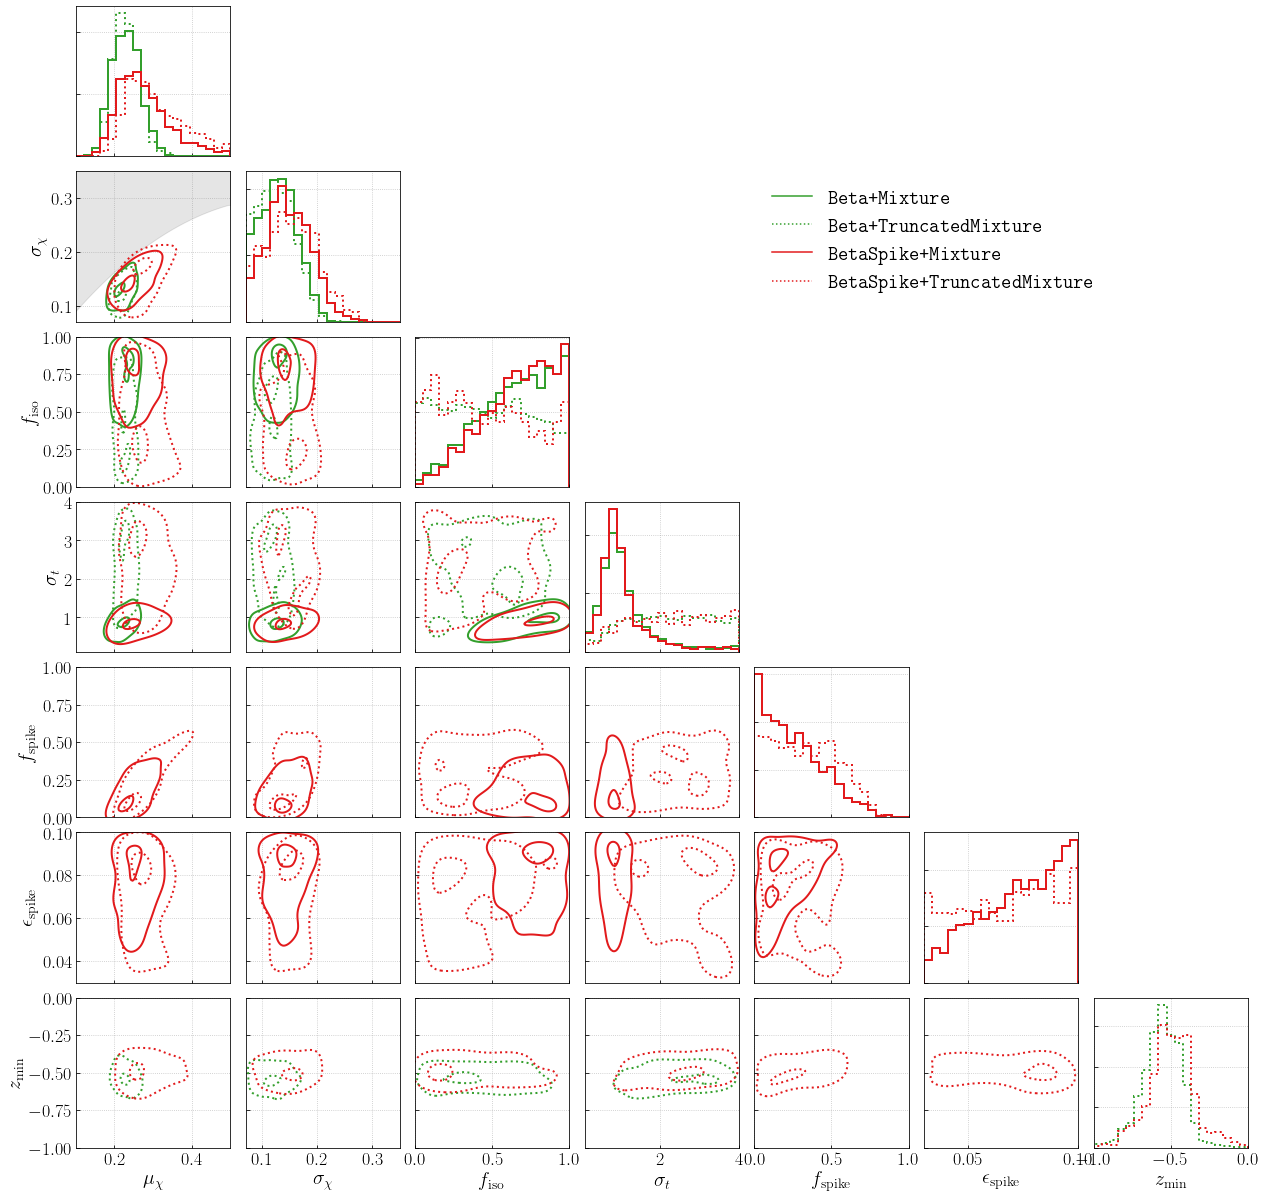

In [9]:
# Make figure 
nVars = 7 
fig, axes = plt.subplots(nVars, nVars, figsize=(nVars*3,nVars*3))

# First, plot 1D histograms along diagonal
for i, var in enumerate(variables):
    
    print(f'Plotting 1d hist for {var}')

    # Get appropriate axis
    ax = axes[i, i]
    ax.set_rasterization_zorder(2)

    # Get limits 
    min_lim = limits[i][0]
    max_lim = limits[i][1]
    
    # Get label
    label = labels[i]
    
    # Cycle through data sets
    for j,data in enumerate(all_data): 
        
        if var in data.keys():

            # Fetch data for this variable
            if 'sigma_spike' in data.keys():
                samples = np.asarray(data[var]['processed'])[(np.asarray(data['sigma_spike']['processed'])>eps_min)]
            else: 
                samples = np.asarray(data[var]['processed'])

            # Plot histogram
            ax.hist(samples, bins=np.linspace(min_lim,max_lim,nbins), histtype='step', 
                        edgecolor=colors[j], lw=2, linestyle=linestyles[j], density=True, 
                        zorder=2)
    
    ax.xaxis.grid(True,which='major',ls=':',color='grey',alpha=0.5)
    ax.yaxis.grid(True,which='major',ls=':',color='grey',alpha=0.5)
    ax.set_xlim(min_lim,max_lim)
    ax.set_yticklabels([])
    ax.tick_params(labelsize=18)

    # x-axis + tick labels depend on which specific axis 
    if i==(nVars-1):
        ax.set_xlabel(label,fontsize=20)
    else: 
        ax.set_xticklabels([])

# Then, fill in 2D histograms
for i_row in np.arange(nVars): 
    for i_col in np.arange(nVars):

        # Get appropriate axis
        ax = axes[i_row, i_col]
        ax.set_rasterization_zorder(2)

        # Limits
        min_lim_x = limits[i_col][0]
        max_lim_x = limits[i_col][1]
        min_lim_y = limits[i_row][0]
        max_lim_y = limits[i_row][1]
        
        # Labels
        label_x = labels[i_col]
        label_y = labels[i_row]
        
        # Make plots right of diagonal invisible
        if i_col>i_row: 
            ax.axis('off')

        # Add 2D hist to left of diagonal     
        elif i_row>i_col:

            print(f'Plotting 2d hist for {variables[i_col]} and {variables[i_row]}')
            
            for j,data in enumerate(all_data):
            
                if variables[i_col] in data.keys() and variables[i_row] in data.keys():

                    # Fetch data
                    if 'sigma_spike' in data.keys():
                        samples_x = np.asarray(data[variables[i_col]]['processed'])[(np.asarray(data['sigma_spike']['processed'])>eps_min)]
                        samples_y = np.asarray(data[variables[i_row]]['processed'])[(np.asarray(data['sigma_spike']['processed'])>eps_min)]
                    else: 
                        samples_x = np.asarray(data[variables[i_col]]['processed'])
                        samples_y = np.asarray(data[variables[i_row]]['processed'])
                    
                    # Plot histogram
                    sns.kdeplot(samples_x, y=samples_y, 
                                    ax=ax, color=colors[j], 
                                    linestyles=linestyles[j], 
                                    linewidths=2,
                                    levels=[0.5, 0.95],
                                    shade=False,
                                    zorder=2)
                    
            ax.xaxis.grid(True,which='major',ls=':',color='grey',alpha=0.5)
            ax.yaxis.grid(True,which='major',ls=':',color='grey',alpha=0.5)
            ax.set_xlim(min_lim_x,max_lim_x)
            ax.set_ylim(min_lim_y,max_lim_y)
            ax.tick_params(labelsize=18)

            # labels depend on which specific axis
            if i_row==nVars-1:
                ax.set_xlabel(label_x,fontsize=20)
            if i_col==0: 
                ax.set_ylabel(label_y,fontsize=20)

            # ticks also depend on which specific axis
            if i_col!=0 and i_row!=nVars-1:
                ax.set_xticklabels([])
                ax.set_yticklabels([])
            elif i_col!=0 and i_row==nVars-1: 
                ax.set_yticklabels([])
            elif i_col==0 and i_row!=nVars-1: 
                ax.set_xticklabels([]) 
                
# Add constraint on mu_chi sigma_chi from prior 
mu_range = np.linspace(0,1,100)
constraint1 = np.sqrt((mu_range**2.)*(1-mu_range)/(1+mu_range))
constraint2 = np.sqrt(mu_range*((1-mu_range)**2.)/(2-mu_range))
total_constraint = np.minimum(constraint1, constraint2)
axes[1][0].fill_between(mu_range, total_constraint, y2=np.zeros(100)+0.5, alpha=0.1, color='k')

# Legend
handles = [Line2D([], [], color=colors[i],ls=linestyles[i],label=model_labels[i]) for i in range(len(model_labels))]
axes[1, 4].legend(handles=handles, loc='upper left', fontsize=20)

plt.subplots_adjust(hspace=0.1, wspace=0.1)

plt.savefig('figure_06.pdf',bbox_inches='tight',dpi=200)